# 导入库，导入数据

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  
import seaborn as sns 
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from pyecharts import options as opts
from pyecharts.charts import Radar
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
data=pd.read_csv('C:/Users/86156/Desktop/心脏病发病预测/心脏病诊断数据集（原数据）.csv',header=None)
data.columns=['年龄','性别','胸痛类型','静息血压','血浆类固醇含（mg/dl)','空腹血糖＞120 mg/dl','静息心电图结果','最高心率',
              '运动型心绞痛','运动引起的 ST 下降','最大运动量时心电图 ST 的斜率','使用荧光染色法测定的主血管数','THAL','患病情况']
data.head(3)

,年龄,性别,胸痛类型,静息血压,血浆类固醇含（mg/dl),空腹血糖＞120 mg/dl,静息心电图结果,最高心率,运动型心绞痛,运动引起的 ST 下降,最大运动量时心电图 ST 的斜率,使用荧光染色法测定的主血管数,THAL,患病情况
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2


# 查看数据基本情况

## 数值分布

In [2]:
data.describe()

,年龄,性别,胸痛类型,静息血压,血浆类固醇含（mg/dl),空腹血糖＞120 mg/dl,静息心电图结果,最高心率,运动型心绞痛,运动引起的 ST 下降,最大运动量时心电图 ST 的斜率,使用荧光染色法测定的主血管数,THAL,患病情况
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [3]:
#查看数据基本情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   年龄                270 non-null    int64  
 1   性别                270 non-null    int64  
 2   胸痛类型              270 non-null    int64  
 3   静息血压              270 non-null    int64  
 4   血浆类固醇含（mg/dl)     270 non-null    int64  
 5   空腹血糖＞120 mg/dl    270 non-null    int64  
 6   静息心电图结果           270 non-null    int64  
 7   最高心率              270 non-null    int64  
 8   运动型心绞痛            270 non-null    int64  
 9   运动引起的 ST 下降       270 non-null    float64
 10  最大运动量时心电图 ST 的斜率  270 non-null    int64  
 11  使用荧光染色法测定的主血管数    270 non-null    int64  
 12  THAL              270 non-null    int64  
 13  患病情况              270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


## 查看缺失值

In [4]:
data.isnull().sum()

年龄                  0
性别                  0
胸痛类型                0
静息血压                0
血浆类固醇含（mg/dl)       0
空腹血糖＞120 mg/dl      0
静息心电图结果             0
最高心率                0
运动型心绞痛              0
运动引起的 ST 下降         0
最大运动量时心电图 ST 的斜率    0
使用荧光染色法测定的主血管数      0
THAL                0
患病情况                0
dtype: int64

## 查看重复值

In [5]:
data.duplicated().sum()

0

# 可视化探索

## 年龄

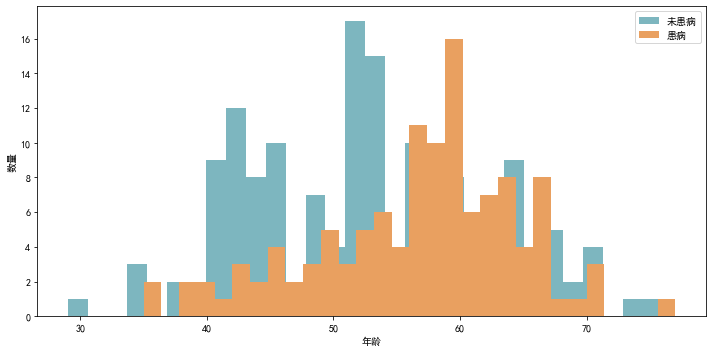

In [6]:
#分类数据
ans_no=data.loc[data['患病情况']==1]
ans_yes=data.loc[data['患病情况']==2]

#数据可视化
plt.figure(figsize=(10,5))
ans_no['年龄'].plot.hist(bins=30,label='未患病',color='#7db6bf')
ans_yes['年龄'].plot.hist(bins=30,label='患病',color='#e9a060')
plt.xlabel('年龄')
plt.ylabel('数量')
plt.legend()
plt.tight_layout()
plt.savefig('年龄与患病的关系.jpg')

### 结果分析
+ 由直方图可得患病者的年龄集中于55-65之间，由此可得年龄为相关影响因素，故未来可以在社会上加大对中老年人定期体检的宣传力度，同时社会各机构也予以支持，有利于在心脏病发病的早期及时发现问题，提升人民幸福水平。

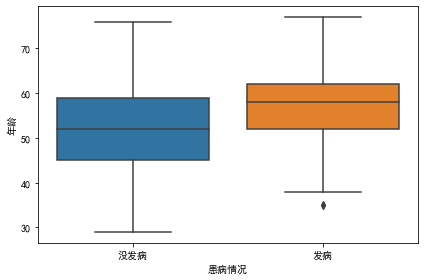

In [7]:
#年龄数据箱线图：发现存在噪声值
sns.boxplot(data=data,x='患病情况',y='年龄')
plt.xticks([0,1],['没发病','发病'])
plt.ylabel('年龄')
plt.tight_layout()
plt.savefig('年龄与患病的关系箱线图.jpg')

## 胸痛类型，荧光染色法，静息心电图结果

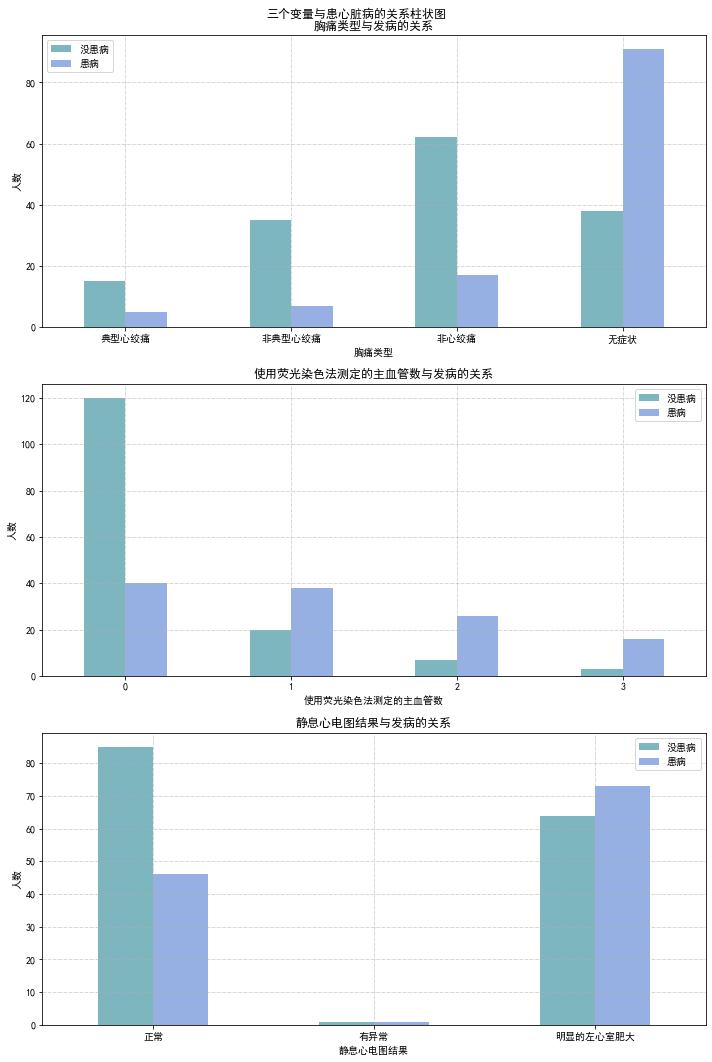

<Figure size 432x288 with 0 Axes>

In [8]:
#通过循环构建图像并加入图例
fig=plt.figure(figsize=(10,15))
list1=['胸痛类型','使用荧光染色法测定的主血管数','静息心电图结果']
list2=[['典型心绞痛','非典型心绞痛','非心绞痛','无症状'],[0,1,2,3],['正常','有异常','明显的左心室肥大']]

for ind,col in enumerate(list1):
    ans_=pd.pivot_table(data,index=col,columns='患病情况',values='年龄',aggfunc='count')
    ax_=fig.add_subplot(3,1,ind+1)
    ans_.plot.bar(ax=ax_,title=f'{col}与发病的关系',ylabel='人数',color=['#7db6bf','#97b0e4'])
    plt.grid(linestyle='-.',linewidth=0.5,axis='both')
    plt.legend(['没患病','患病'])
    ax_.set_xticks(range(len(list2[ind])))
    ax_.set_xticklabels([str(item) for item in list2[ind]],rotation=0)
    
plt.suptitle('三个变量与患心脏病的关系柱状图')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig('胸痛类型，荧光染色法，静息心电图结果.png')

### 结果分析
+ 由柱状图可得，心脏病发病与胸痛类型关联并不严密，多数患病者并没有典型的胸痛症状；使用荧光染色法测定的主血管数与发病的关系也不明显；对比分析可得，心脏病发病与左心室肥大有一定相关性。

## 最大运动量时心电图 ST 的斜率，THAL

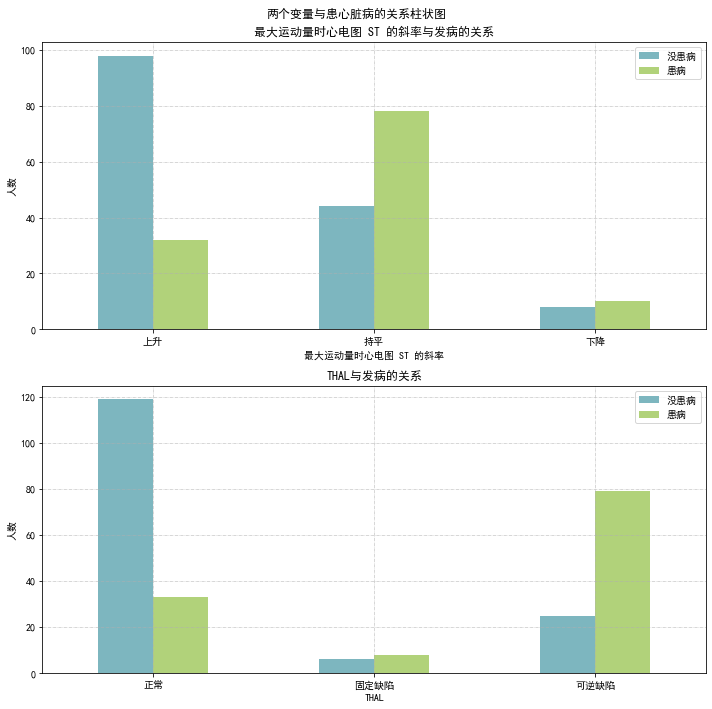

In [9]:
fig=plt.figure(figsize=(10,10))
list1=['最大运动量时心电图 ST 的斜率','THAL']
list2=[['上升','持平','下降'],['正常','固定缺陷','可逆缺陷']]
for ind,col in enumerate(list1):
    ans_=pd.pivot_table(data,index=col,columns='患病情况',values='年龄',aggfunc='count')
    ax_=fig.add_subplot(2,1,ind+1)
    ans_.plot.bar(ax=ax_,title=f'{col}与发病的关系',ylabel='人数',color=['#7db6bf','#b1d27a'])
    plt.grid(linestyle='-.',linewidth=0.5,axis='both')
    plt.legend(['没患病','患病'])
    ax_.set_xticks(range(len(list2[ind])))
    ax_.set_xticklabels([str(item) for item in list2[ind]],rotation=0)
plt.suptitle('两个变量与患心脏病的关系柱状图')
plt.tight_layout()
plt.show()

### 结果分析
+ ST/HR斜率方法能更精确的反应心肌对氧需求与供应的不平衡关系，而图示结果表明心脏病发病与心肌供氧有一定关系；地中海贫血的可逆缺陷与心脏病发病的相关性较强

## 静息血压,血浆类固醇含（mg/dl),最高心率,运动引起的 ST 下降

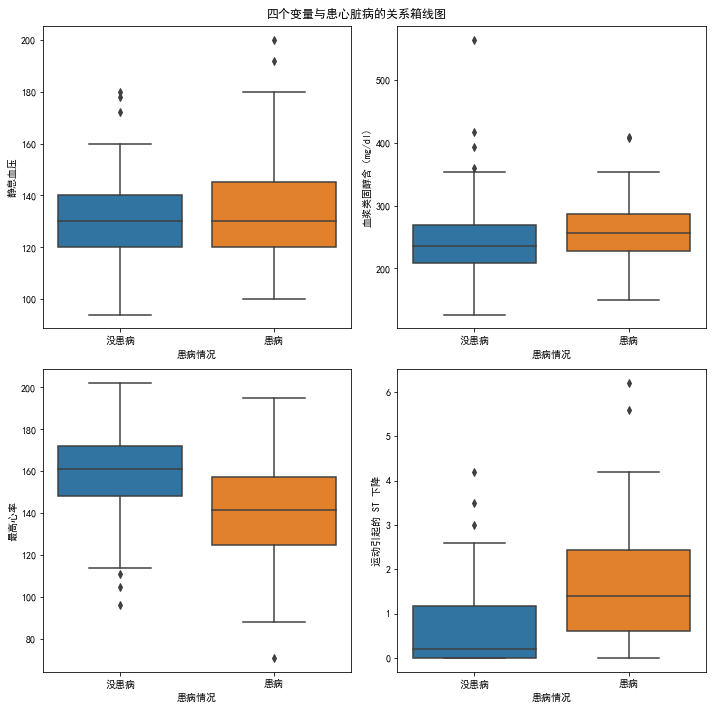

In [10]:
fig=plt.figure(figsize=(10,10))
list2=['静息血压','血浆类固醇含（mg/dl)','最高心率','运动引起的 ST 下降']  
for ind,col in enumerate(list2):
    ax_=fig.add_subplot(2,2,ind+1)
    sns.boxplot(data=data,x='患病情况',y=col)
    plt.xticks([0,1],['没患病','患病'])
plt.suptitle('四个变量与患心脏病的关系箱线图')
plt.tight_layout()

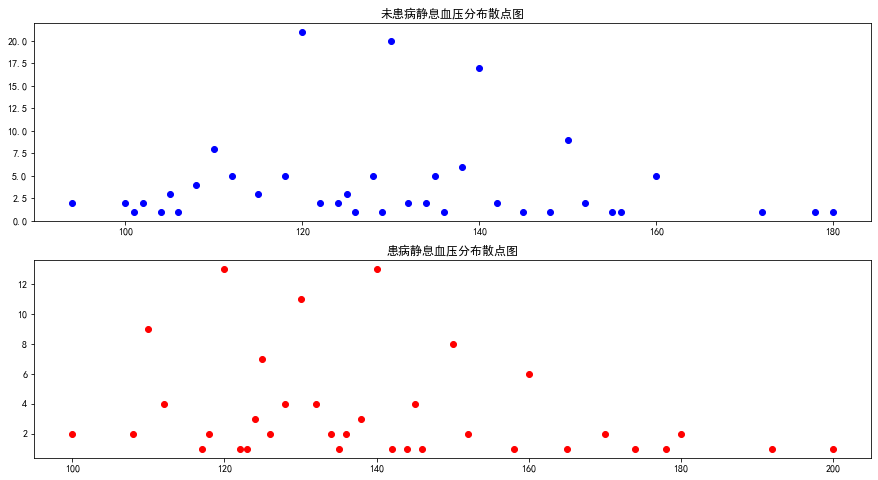

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(ans_no['静息血压'].value_counts(),'ob',linewidth=1)
plt.title('未患病静息血压分布散点图')
plt.subplot(2,1,2)
plt.plot(ans_yes['静息血压'].value_counts(),'or',linewidth=1)
plt.title('患病静息血压分布散点图')
plt.show()

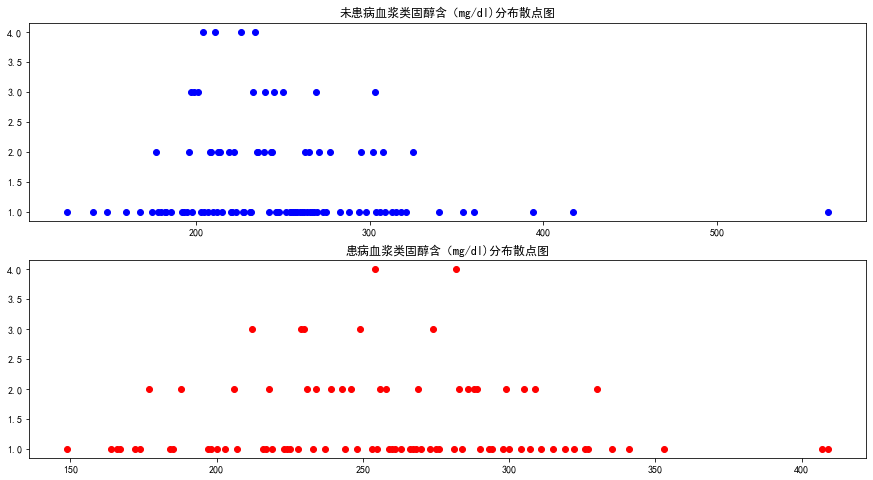

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(ans_no['血浆类固醇含（mg/dl)'].value_counts(),'ob',linewidth=1)
plt.title('未患病血浆类固醇含（mg/dl)分布散点图')
plt.subplot(2,1,2)
plt.plot(ans_yes['血浆类固醇含（mg/dl)'].value_counts(),'or',linewidth=1)
plt.title('患病血浆类固醇含（mg/dl)分布散点图')
plt.show()

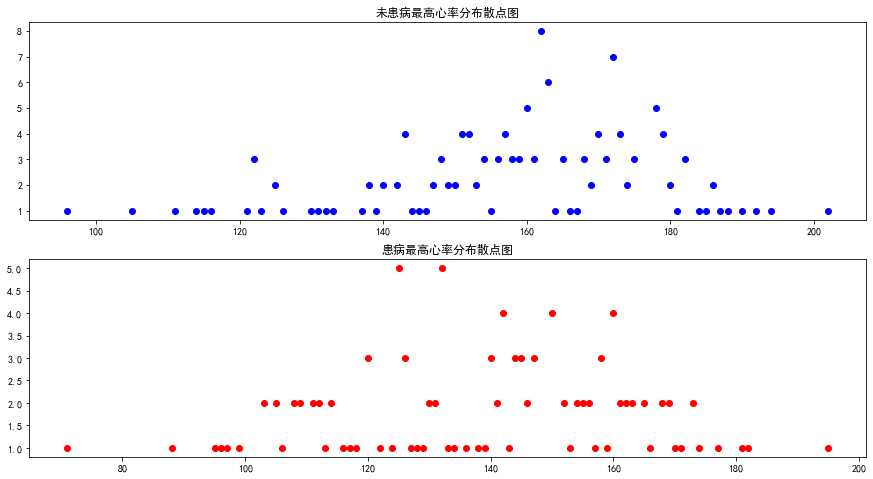

In [13]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(ans_no['最高心率'].value_counts(),'ob',linewidth=1)
plt.title('未患病最高心率分布散点图')
plt.subplot(2,1,2)
plt.plot(ans_yes['最高心率'].value_counts(),'or',linewidth=1)
plt.title('患病最高心率分布散点图')
plt.show()

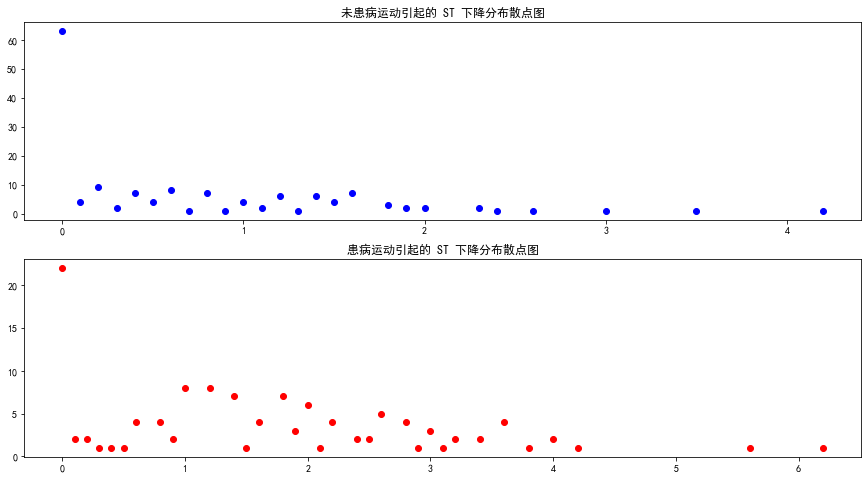

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(ans_no['运动引起的 ST 下降'].value_counts(),'ob',linewidth=1)
plt.title('未患病运动引起的 ST 下降分布散点图')
plt.subplot(2,1,2)
plt.plot(ans_yes['运动引起的 ST 下降'].value_counts(),'or',linewidth=1)
plt.title('患病运动引起的 ST 下降分布散点图')
plt.show()

### 结果分析
+ 综合以上图的数据可得，最高心率与运动引起的 ST 下降（即心肌供氧不足）与心脏病发病的相关性较强。

## 性别，空腹血糖，运动型心绞痛

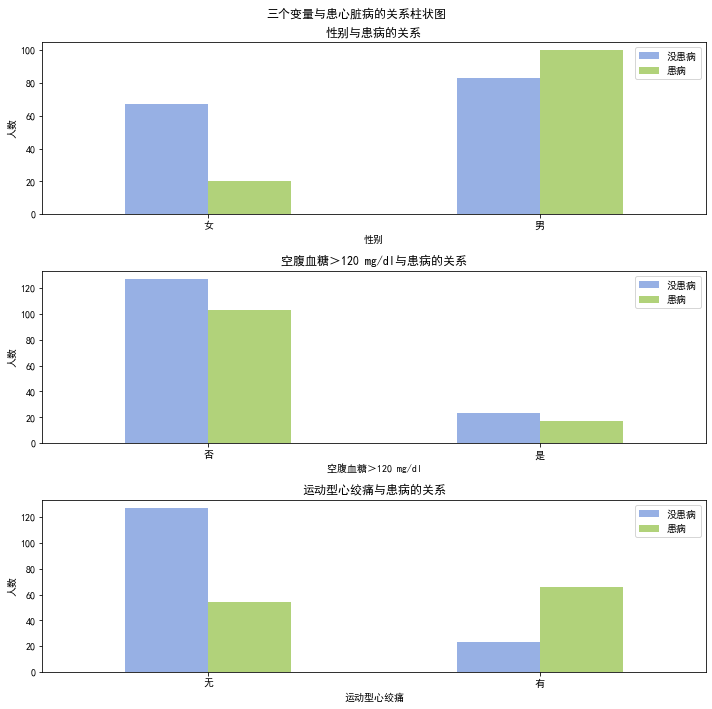

In [15]:
fig=plt.figure(figsize=(10,10))
# 创建一个列表，包含要分析的列
list1=['性别','空腹血糖＞120 mg/dl','运动型心绞痛']  
list4=[['女','男'],['否','是'],['无','有']]
for ind,col in enumerate(list1):
    ans_=pd.pivot_table(data,
              index=col,  # 设置行索引
              columns='患病情况',  # 设置列索引
              values='年龄',  # 统计个数，随便挑一列
              aggfunc='count' # 统计方法
              )
    ax_=fig.add_subplot(3,1,ind+1)
    ans_.plot.bar(ax=ax_,  # 指定把图画到哪个子图里面
                 title=f'{col}与患病的关系',  # 设置一个标题
                 ylabel='人数',
                 color=['#97b0e4','#b1d27a'])
    plt.legend(['没患病','患病'])
    ax_.set_xticks(range(len(list4[ind])))
    ax_.set_xticklabels([str(item) for item in list4[ind]],rotation=0)
# 添加一个大标题
plt.suptitle('三个变量与患心脏病的关系柱状图')
plt.tight_layout()

### 结果分析
+ 由性别图可得，男性心脏病发病率要高于女性，而空腹血糖＞120 mg/dl，运动型心绞痛与患病的关系不大

# 数据处理
+ 由箱线图可得部分数据存在噪声值，因此对数据进行部分处理

In [16]:
#噪声值处理
ans_max=[0,1,2,3]
ans_min=[0,1,2,3]
for ind,col in enumerate(list2):
    ans=data[[col]].describe()
    ans_max[ind]=2.5*ans.values[6]-1.5*ans.values[4]
    ans_min[ind]=2.5*ans.values[4]-1.5*ans.values[6]
print(ans_max)
print(ans_min) 

[array([170.]), array([380.5]), array([215.5]), array([4.])]
[array([90.]), array([112.5]), array([83.5]), array([-2.4])]


([<matplotlib.axis.XTick at 0x1a85691ec10>,
 [Text(0, 0, '没患病'), Text(1, 0, '患病')])

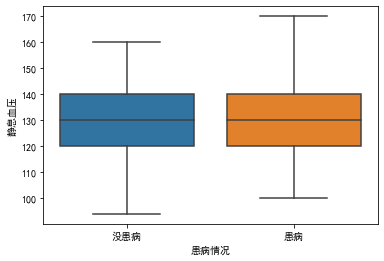

In [17]:
#处理后的数据
ans1=data['静息血压'].describe()
data.loc[data['静息血压']<int(ans_min[0]), '静息血压']=ans1.values[5]
data.loc[data['静息血压']>int(ans_max[0]), '静息血压']=ans1.values[5]
sns.boxplot(data=data,x='患病情况',y='静息血压')
plt.xticks([0,1],['没患病','患病'])

# 特征工程

## 相关系数

In [18]:
corr_data=data.corr()['患病情况'].abs()
corr_data=corr_data.sort_values(ascending=False)[1:]
corr_data

THAL                0.525020
使用荧光染色法测定的主血管数      0.455336
运动型心绞痛              0.419303
最高心率                0.418514
运动引起的 ST 下降         0.417967
胸痛类型                0.417436
最大运动量时心电图 ST 的斜率    0.337616
性别                  0.297721
年龄                  0.212322
静息心电图结果             0.182091
静息血压                0.125164
血浆类固醇含（mg/dl)       0.118021
空腹血糖＞120 mg/dl      0.016319
Name: 患病情况, dtype: float64

## 数据集划分

In [19]:
feature_list=corr_data[:13].index.tolist()
X=data[feature_list]
Y=data['患病情况']

DTC=DecisionTreeClassifier()
train_X,test_X,train_Y,test_Y=train_test_split(X,Y)
model=DTC.fit(train_X,train_Y)
prey=model.predict(test_X)
accuracy_score(test_Y,prey)

0.7205882352941176

### 结果分析
+ 留出法的拟合结果较好，尝试其他算法

## 使用k折交叉验证的方法加以改进

In [20]:
list5=[]
for train,test in KFold(n_splits=10).split(X,Y):
    tr_index=X.index[train]
    model.fit(X.loc[tr_index,feature_list],Y[tr_index])
    te_index=X.index[test]
    train_secore=model.score(X.loc[te_index,feature_list],Y[te_index])
    list5.append(train_secore)
    list5_rounded=[round(num, 2) for num in list5]
print(list5_rounded)

[0.63, 0.7, 0.7, 0.74, 0.85, 0.67, 0.74, 0.74, 0.81, 0.81]


## 查看决策树分类等不同模型的适配度

In [21]:
def model_fit(model,feature_list,data,train,test):
    Y_=data['患病情况']
    tr_index=data.index[train]
    model.fit(data.loc[tr_index,feature_list],Y_[tr_index])
    te_index=data.index[test]
    train_secore=model.score(data.loc[te_index,feature_list],Y_[te_index])
    return train_secore,model

models=[DecisionTreeClassifier(),LogisticRegressionCV(),KNeighborsClassifier(),RandomForestClassifier()]
# 对模型进行训练
for mo in models:
    # 对数据进行分割，使用K折交叉验证，同时返回第几次分割和分割结果
    for i,(train,test) in enumerate(KFold(n_splits=5).split(X,Y)):
        # 调用函数进行模型训练，并返回分类精准度
        tr_secore,model=model_fit(mo,feature_list,data,train,test)
        print(f'{str(model)[:-2]}模型\n第{i+1}训练结果是{tr_secore}')
    print('*'*30)

DecisionTreeClassifier模型
第1训练结果是0.6851851851851852
DecisionTreeClassifier模型
第2训练结果是0.7407407407407407
DecisionTreeClassifier模型
第3训练结果是0.7777777777777778
DecisionTreeClassifier模型
第4训练结果是0.7407407407407407
DecisionTreeClassifier模型
第5训练结果是0.7962962962962963
******************************
LogisticRegressionCV模型
第1训练结果是0.8333333333333334
LogisticRegressionCV模型
第2训练结果是0.8518518518518519
LogisticRegressionCV模型
第3训练结果是0.7777777777777778
LogisticRegressionCV模型
第4训练结果是0.8148148148148148
LogisticRegressionCV模型
第5训练结果是0.8703703703703703
******************************
KNeighborsClassifier模型
第1训练结果是0.7222222222222222
KNeighborsClassifier模型
第2训练结果是0.7037037037037037
KNeighborsClassifier模型
第3训练结果是0.6851851851851852
KNeighborsClassifier模型
第4训练结果是0.6481481481481481
KNeighborsClassifier模型
第5训练结果是0.6666666666666666
******************************
RandomForestClassifier模型
第1训练结果是0.7592592592592593
RandomForestClassifier模型
第2训练结果是0.7962962962962963
RandomForestClassifier模型
第3训练结果是0.8703703703703703
RandomFor

### 结果分析
+ 数据量较少，无法进一步分析对比，初步可以得到LogisticRegressionCV模型的拟合效果较为理想

## 将数据标准化后带入最适配的模型

In [22]:
S_arr=StandardScaler().fit_transform(data)
# 将标准化后的数据设置为DataFrame
S_data=pd.DataFrame(S_arr,index=data.index,columns=data.columns)
S_data['患病情况']=data['患病情况']
for i,(train,test) in enumerate(KFold(n_splits=5).split(X,Y)):
    tr_secore,model=model_fit(LogisticRegressionCV(),feature_list,S_data,train,test)
    # 打印格式化结果
    print(f'{str(model)[:-2]}模型\n第{i+1}训练结果是{tr_secore}')

LogisticRegressionCV模型
第1训练结果是0.8148148148148148
LogisticRegressionCV模型
第2训练结果是0.8148148148148148
LogisticRegressionCV模型
第3训练结果是0.8333333333333334
LogisticRegressionCV模型
第4训练结果是0.8518518518518519
LogisticRegressionCV模型
第5训练结果是0.8703703703703703


## 模型评估，对结果进行可视化

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.50it/s]


,Model,Features,Error Rate
0,DecisionTreeClassifier(),[THAL],0.248148
1,DecisionTreeClassifier(),[THAL],0.248148
2,DecisionTreeClassifier(),"[THAL, 使用荧光染色法测定的主血管数]",0.203704
3,DecisionTreeClassifier(),[THAL],0.248148
4,DecisionTreeClassifier(),"[THAL, 使用荧光染色法测定的主血管数]",0.203704
...,...,...,...
307,"(DecisionTreeClassifier(max_features='auto', r...","[THAL, 使用荧光染色法测定的主血管数, 运动型心绞痛, 最高心率, 运动引起的 ST ...",0.174074
308,"(DecisionTreeClassifier(max_features='auto', r...","[THAL, 使用荧光染色法测定的主血管数, 运动型心绞痛, 最高心率, 运动引起的 ST ...",0.177778
309,"(DecisionTreeClassifier(max_features='auto', r...","[THAL, 使用荧光染色法测定的主血管数, 运动型心绞痛, 最高心率, 运动引起的 ST ...",0.177778
310,"(DecisionTreeClassifier(max_features='auto', r...","[THAL, 使用荧光染色法测定的主血管数, 运动型心绞痛, 最高心率, 运动引起的 ST ...",0.177778


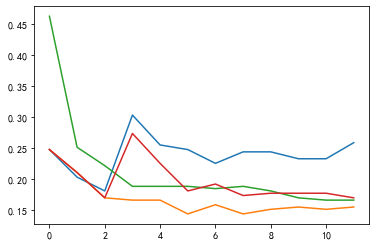

In [23]:
def get_feature(corr_data,n=13):
    # 获取前十三个特征并将提取数据的行索引，并将其处理成列表
    feature_list=corr_data[:n].index.tolist()
    return feature_list

results=[]
# 对不同的模型进行循环
for mo in models:
    # 定义一个空间，存储不同特征对应的平均得分
    feature_train_ans=[]
    feature_list_kong=[]
    # 对特征进行筛选，依次选择n个特征
    for fn in tqdm(range(1,13)):
        # 根据特征的个数提取特征名称
        feature_list=get_feature(corr_data,n=fn)
        feature_list_kong.append(feature_list)
        # 定义一个数字，记录精准度
        ts=0
        # 将数据进行K折分割
        for i,(train,test) in enumerate(KFold(n_splits=5).split(X,Y)):
            # 使用循环中的模型、筛选的特征、标准化后的数据进行模型训练并评估
            tr_secore,model=model_fit(mo,feature_list,S_data,train,test)
            # 计算准确度之和
            ts+=tr_secore
        # 将当前特征对应的准确度求平均（ts/n）或平均错误率（1-ts/n）记录到特征对应的平均得分空间中
        feature_train_ans.append(1-ts/5)
        for idx,feature_list in enumerate(feature_list_kong):
            results.append({'Model': mo, 'Features': feature_list, 'Error Rate': feature_train_ans[idx]})
    # 画出当前模型在不同特征下的平均精度/错误率
    plt.plot(feature_train_ans)
results_df=pd.DataFrame(results)
results_df

In [24]:
#results_df.to_csv('results.csv', index=False)
#已经生成对应表格了，防止报错注解掉

### 结果分析
+ 由表格及生成的平均错误率折线图可得，错误率最低（橙色线条）的是LogisticRegressionCV模型，最低值达到了0.14，绿色线条对应模型为KNeighborsClassifier，在经过十次迭代后错误率也接近0.15，红色线条为RandomForestClassifier，最不稳定的蓝色线条为DecisionTreeClassifier。

# 总结
+ 本次模型训练的数据共有三百余条，对于模型训练来讲略有些少，模型训练不充分导致预测的训练结果略有些重复。但经过多种模型测试，可以发现LogisticRegressionCV模型较为适配，但错误率仍偏高，作为医学项目，必须努力提高其准确性，将错误率压到尽可能低，才能为社会的进一步发展做出贡献。本次项目探索虽然粗糙，但仍可以得出部分值得重视的结论，如：中老年人患病风险较高，应多加关注多加关怀；体检时，明显的左心室肥大患者，地中海贫血存在可逆缺陷的人群，心肌供养能力不足（运动引起的 ST 下降），最高心率较低的人群及男性都可以在体检时对心脏进行检查以提前预防患病风险。